<a href="https://colab.research.google.com/github/Omkar675/Cyber-security-threat-scannner-/blob/main/credit_card_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:

!pip install xgboost


import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

In [14]:
df = pd.read_csv("/content/creditcard.csv")

print("Initial Shape:", df.shape)

Initial Shape: (284807, 31)


In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
missing = df.isna().sum()


for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)


In [18]:
df["Class"] = df["Class"].astype(int)

In [19]:
zero_var_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=zero_var_cols, inplace=True)

In [20]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["norm_Time"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))
df["norm_Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))


df.drop(columns=["Time", "Amount"], inplace=True)


print("Final Shape:", df.shape)
print(df.head())

Final Shape: (283726, 31)
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  no

In [21]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,norm_Time,norm_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996823,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996823,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996802,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996802,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996781,-0.073813


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA

def feature_engineering(df, apply_pca=False, n_components=10):
    df = df.copy()


    scaler = StandardScaler()

    if "Amount" in df.columns:
        df["Amount_scaled"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
    if "Time" in df.columns:
        df["Time_scaled"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))


    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if "Class" in numeric_cols:
        numeric_cols.remove("Class")

    pt = PowerTransformer(method='yeo-johnson')
    df[numeric_cols] = pt.fit_transform(df[numeric_cols])


    if "V14" in df.columns and "V17" in df.columns:
        df["V14_plus_V17"] = df["V14"] + df["V17"]

    if "V10" in df.columns and "V12" in df.columns:
        df["V10_times_V12"] = df["V10"] * df["V12"]

    if "Amount_scaled" in df.columns and "Time_scaled" in df.columns:
        df["Amount_per_Time"] = df["Amount_scaled"] / (df["Time_scaled"] + 1)


    if "Amount" in df.columns:
        df["HighAmountFlag"] = (df["Amount"] > df["Amount"].median()).astype(int)


    if apply_pca:
        v_cols = [col for col in df.columns if col.startswith("V")]
        if len(v_cols) >= n_components:
            pca = PCA(n_components=n_components, random_state=42)
            pca_data = pca.fit_transform(df[v_cols])

            for i in range(n_components):
                df[f"PCA_{i+1}"] = pca_data[:, i]



    return df


df = pd.read_csv("/content/creditcard.csv")
df_engineered = feature_engineering(df, apply_pca=True)

print("After Feature Engineering:", df_engineered.shape)
df_engineered.head()


After Feature Engineering: (284807, 47)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,-2.434947,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,...,-0.022318,-0.342821,-1.646671,-1.247677,0.072302,-1.608187,1.038918,-1.322917,0.218701,-0.122392
1,-2.434947,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,...,0.086903,-0.442795,0.524791,1.250753,-0.609662,-0.392786,0.385274,0.502026,0.212901,0.494466
2,-2.434688,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,...,-0.390067,1.286243,-1.490306,-1.196357,-0.177140,-2.218735,-0.075154,-0.435414,-1.159590,-0.119563
3,-2.434688,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,...,0.356410,-1.495761,-1.733336,-0.067084,0.535853,-0.706728,-1.342376,0.955202,-0.012114,-0.654750
4,-2.434458,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,...,0.747723,-1.785094,-1.412413,0.151802,-0.627187,-0.454984,0.356074,-0.972336,-0.176675,1.601475


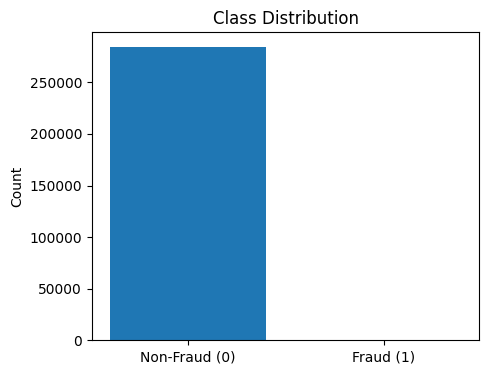

In [25]:
plt.figure(figsize=(5,4))
counts = df['Class'].value_counts()
plt.bar(['Non-Fraud (0)', 'Fraud (1)'], counts.values)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.show()


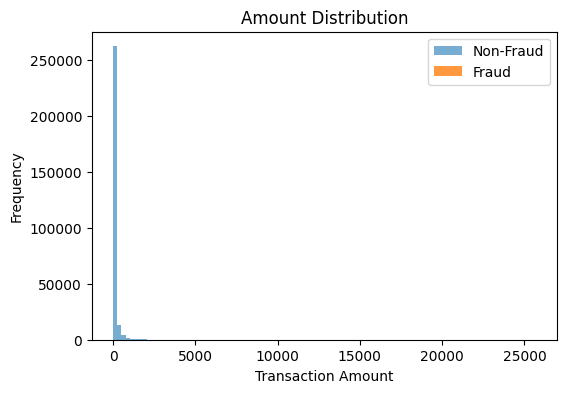

In [26]:

plt.figure(figsize=(6,4))
plt.hist(df[df['Class']==0]['Amount'], bins=100, alpha=0.6, label="Non-Fraud")
plt.hist(df[df['Class']==1]['Amount'], bins=100, alpha=0.8, label="Fraud")
plt.legend()
plt.title("Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


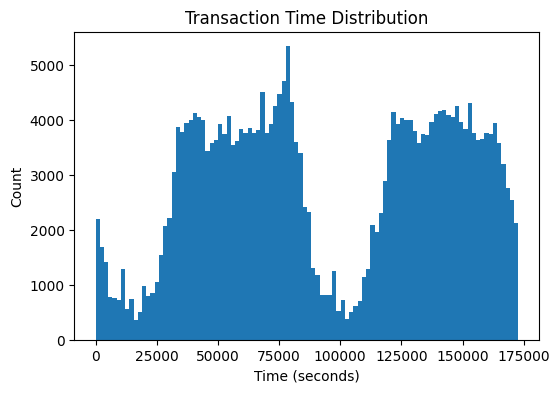

In [27]:

plt.figure(figsize=(6,4))
plt.hist(df['Time'], bins=100)
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds)")
plt.ylabel("Count")
plt.show()

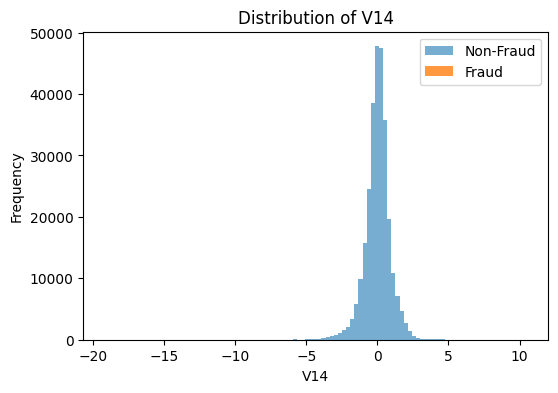

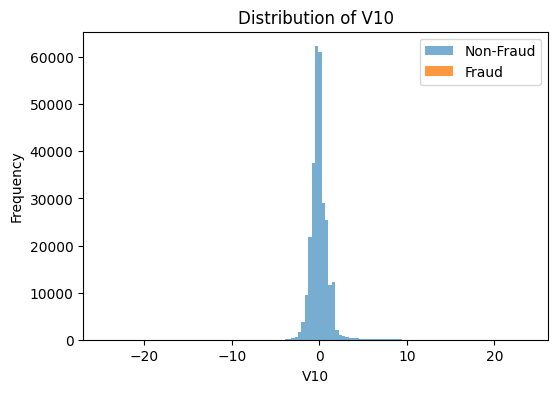

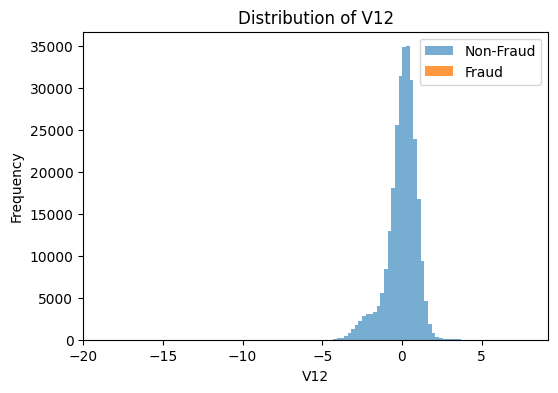

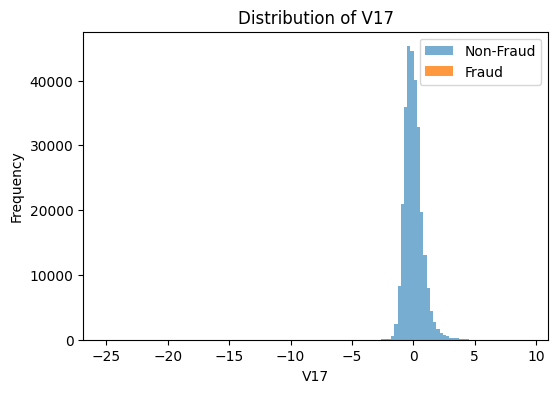

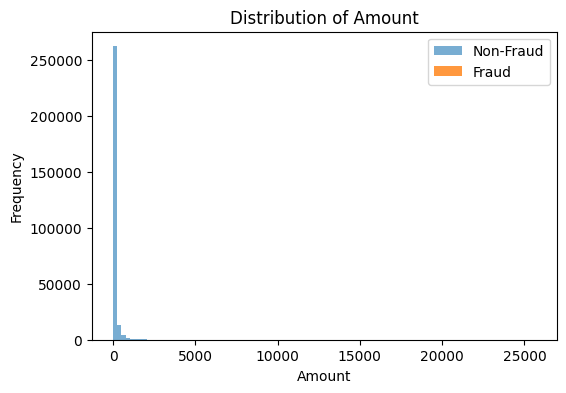

In [28]:

important_features = ['V14', 'V10', 'V12', 'V17', 'Amount']

for col in important_features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        plt.hist(df[df['Class']==0][col], bins=100, alpha=0.6, label="Non-Fraud")
        plt.hist(df[df['Class']==1][col], bins=100, alpha=0.8, label="Fraud")
        plt.legend()
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

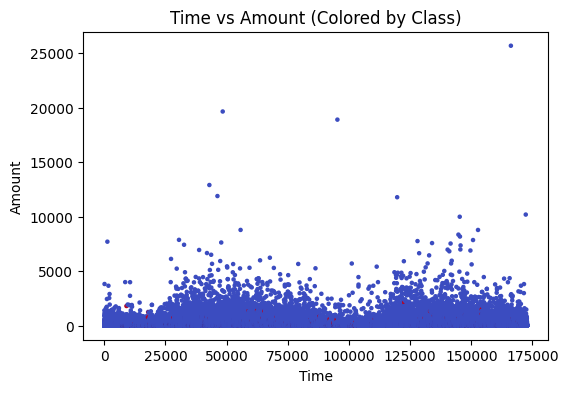

In [29]:

plt.figure(figsize=(6,4))
plt.scatter(df['Time'], df['Amount'], c=df['Class'], cmap='coolwarm', s=5)
plt.title("Time vs Amount (Colored by Class)")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [31]:

X = df.drop("Class", axis=1)
y = df["Class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


In [32]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)


y_pred = rf.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [35]:

cm = confusion_matrix(y_test, y_pred)
print(cm)



[[56859     5]
 [   17    81]]


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate(model, X_test, y_test, name):
    print("\n============================")
    print("Model:", name)
    print("============================")
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(
    max_iter=5000,
    solver='lbfgs',
    class_weight='balanced'
)

log_reg.fit(X_train_scaled, y_train)

evaluate(log_reg, X_test_scaled, y_test, "Logistic Regression (Scaled)")



Model: Logistic Regression (Scaled)
[[55478  1386]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [38]:
import pickle

# Example: Saving XGBoost model
with open("fraud_model.pkl", "wb") as f:
    pickle.dump(log_reg, f)

print("Model saved as fraud_model.pkl")



Model saved as fraud_model.pkl


In [39]:
import pickle

# Example: Saving XGBoost model
with open("rf_fraud_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Model saved as rf_fraud_model.pkl")


Model saved as rf_fraud_model.pkl
